In [1]:
import pandas as pd

In [2]:
notas = pd.read_csv("ratings.csv")
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
notas.shape

(100836, 4)

In [4]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas['nota'].head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

In [6]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [7]:
notas['nota'].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [8]:
notas['nota'].mean()

3.501556983616962

<Axes: ylabel='Frequency'>

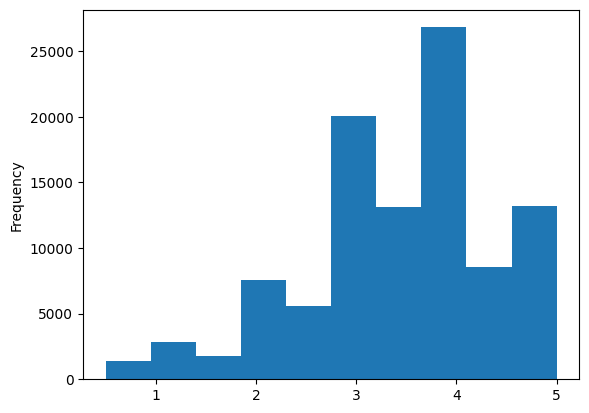

In [9]:
notas['nota'].plot(kind='hist')

In [10]:
notas['nota'].median()

3.5

In [11]:
mediana = notas['nota'].median()
media = notas['nota'].mean()
print(f'Mediana é {mediana}')
print(f'Média é {media}')

Mediana é 3.5
Média é 3.501556983616962


In [12]:
notas['nota'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: ylabel='nota'>

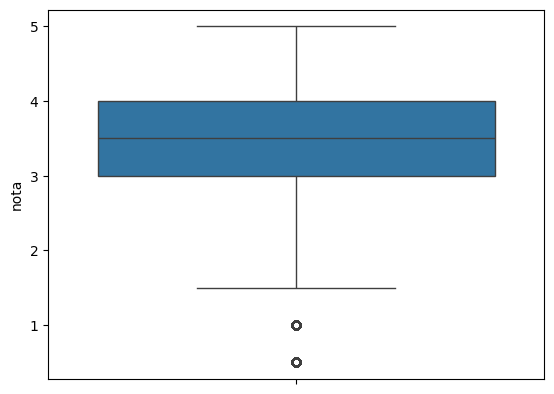

In [13]:
import seaborn as sns

sns.boxplot(notas['nota'])

In [14]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
notas.query("filmeId == 1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [16]:
notas.query("filmeId == 1").mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [17]:
notas.query("filmeId == 1")['nota'].mean()

3.9209302325581397

In [18]:
notas.query("filmeId == 2")['nota'].mean()

3.4318181818181817

In [19]:
medias_por_filme = notas.groupby("filmeId")['nota'].mean()

In [20]:
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

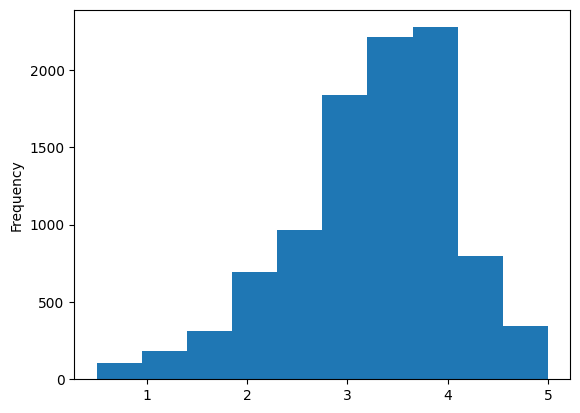

In [21]:
medias_por_filme.plot(kind='hist')

<Axes: ylabel='nota'>

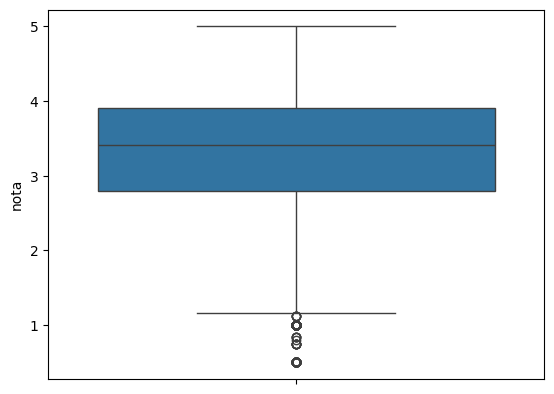

In [22]:
sns.boxplot(medias_por_filme)

In [23]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

Text(0.5, 1.0, 'Histograma das médias dos filmes')

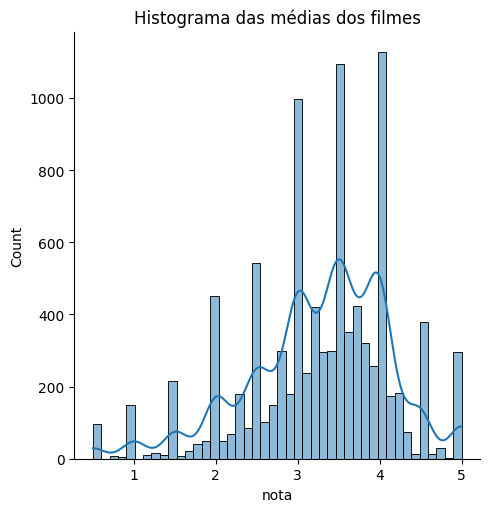

In [24]:
import matplotlib.pyplot as plt

sns.displot(medias_por_filme, kde=True)
plt.title("Histograma das médias dos filmes")

In [25]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


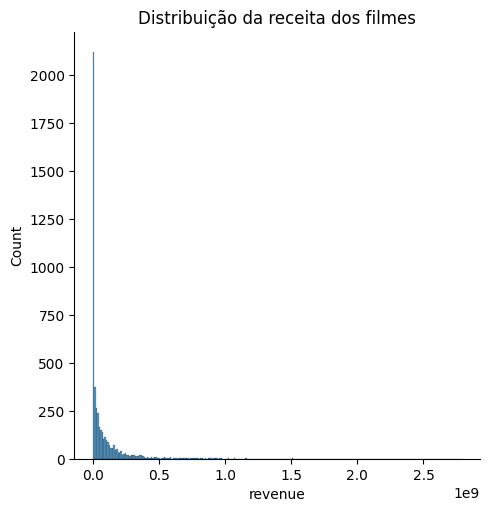

In [26]:
sns.displot(tmdb.revenue)
plt.title("Distribuição da receita dos filmes")
plt.show()

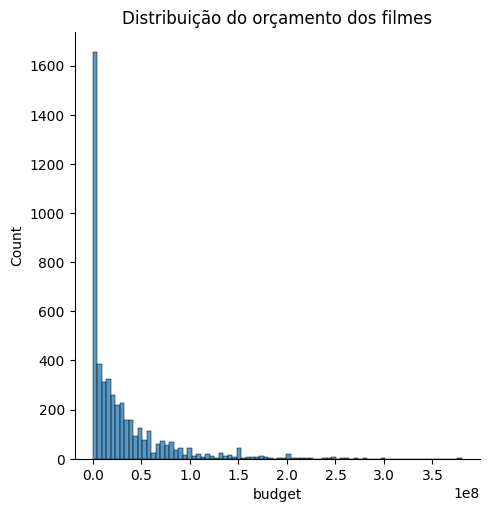

In [27]:
sns.displot(tmdb['budget'])
plt.title("Distribuição do orçamento dos filmes")
plt.show()

In [28]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [29]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [30]:
tmdb.query("revenue < 500")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
83,27000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,79698,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Love is longer than life.,The Lovers,4.8,34
135,150000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",http://www.thewolfmanmovie.com/,7978,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-02-11,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,When the moon is full the legend comes to life,The Wolfman,5.5,549
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",NaN,10588,"[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-11-21,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Don't mess with the hat.,The Cat in the Hat,4.9,366
309,84000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",NaN,10214,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 2546, ""n...",en,Son of the Mask,"Tim Avery, an aspiring cartoonist, finds himse...",17.815595,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2005-02-18,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Who's next?,Son of the Mask,3.6,338
376,90000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,10357,"[{""id"": 1552, ""name"": ""subway""}, {""id"": 2859, ...",en,Volcano,An earthquake shatters a peaceful Los Angeles ...,19.836124,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-04-25,0,104.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Released,The coast is toast,Volcano,5.2,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7


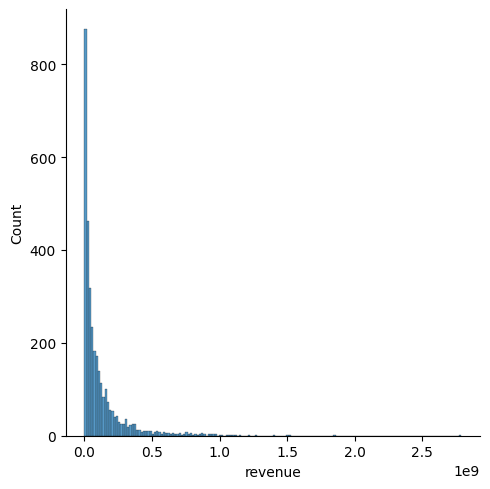

In [31]:
com_faturamento = tmdb.query("revenue > 0")
sns.displot(com_faturamento['revenue'])

In [32]:
tmdb['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [33]:
tmdb['original_language'].value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [34]:
tmdb['original_language'].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

In [35]:
tmdb['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [36]:
tmdb['original_language'].value_counts().to_frame()

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [37]:
tmdb['original_language'].value_counts().to_frame().reset_index()

,original_language,count
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [38]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: >

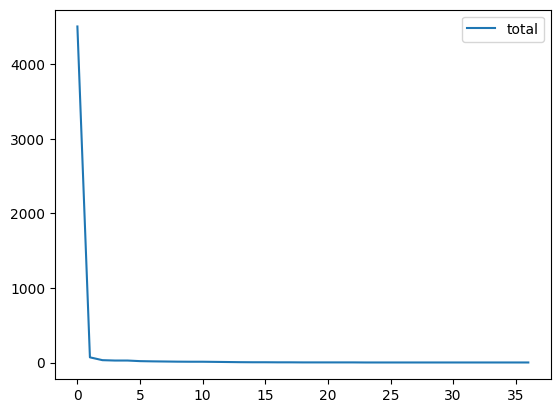

In [39]:
contagem_de_lingua.plot()

<Axes: xlabel='original_language', ylabel='total'>

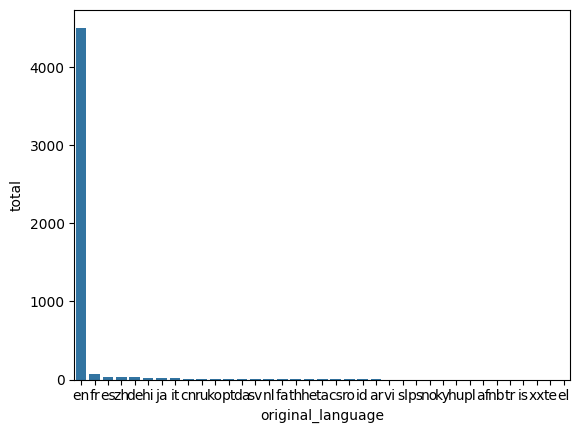

In [40]:
sns.barplot(data=contagem_de_lingua, x='original_language', y='total')

<Axes: xlabel='original_language', ylabel='count'>

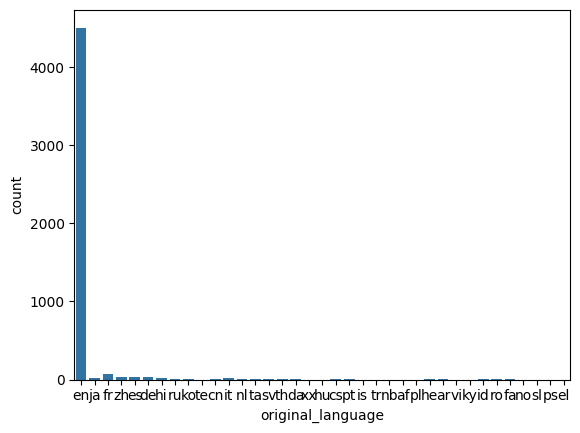

In [41]:
sns.countplot(data=tmdb, x="original_language")

<Axes: ylabel='total'>

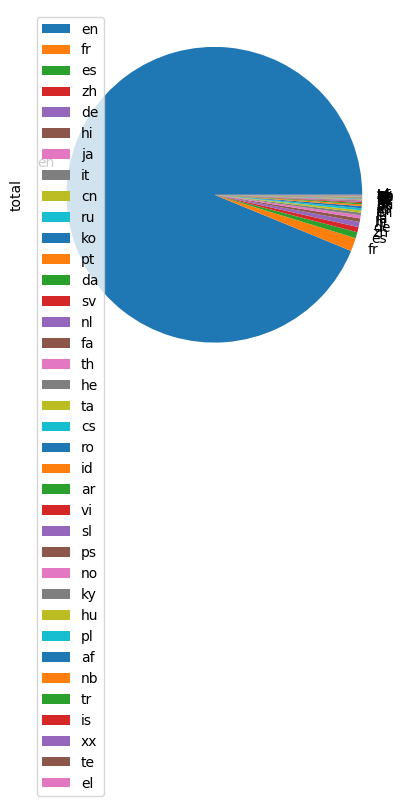

In [42]:
contagem_de_lingua.plot(kind="pie", y="total", labels=contagem_de_lingua['original_language'])

In [45]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_geral, total_de_ingles, total_do_resto)


4803 4505 298


In [46]:
dados = {
    "lingua": ["ingles", "outros"],
    "total": [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

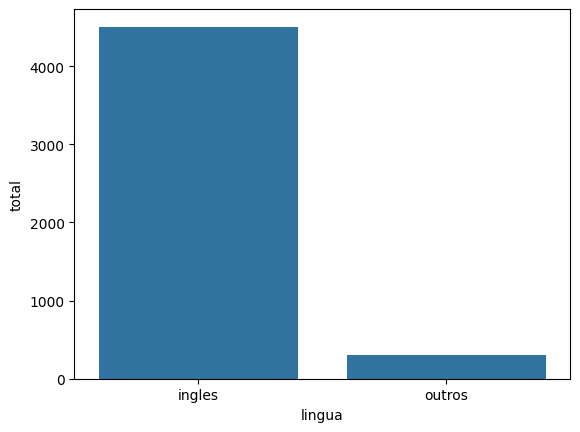

In [47]:
sns.barplot(data = dados, x="lingua", y="total")

<Axes: ylabel='total'>

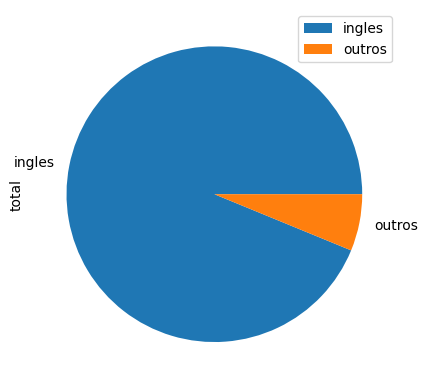

In [49]:
dados.plot(kind="pie", y="total", labels=dados["lingua"])

In [51]:
total_de_outrs_filmes_por_lingua = tmdb.query("original_language != 'en'")["original_language"].value_counts()
total_de_outrs_filmes_por_lingua.head()

original_language
fr    70
es    32
zh    27
de    27
hi    19
Name: count, dtype: int64

<Axes: xlabel='original_language', ylabel='count'>

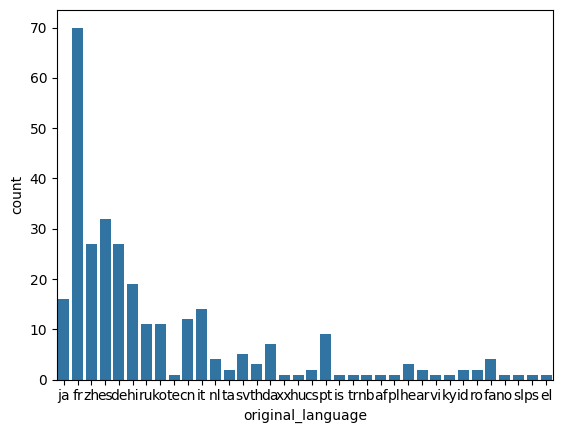

In [52]:
sns.countplot(data=tmdb.query("original_language != 'en'"), x="original_language")

<hr>

## Seaborn Exercise

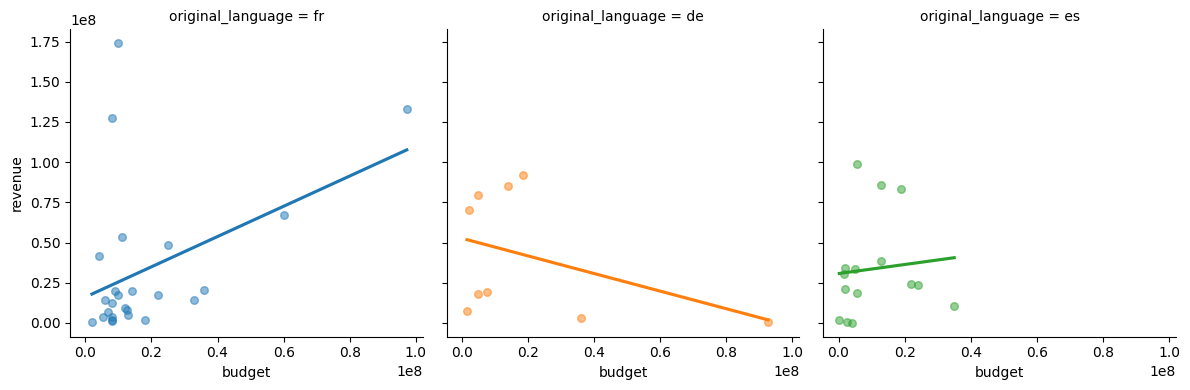

In [54]:
dados = tmdb[['title', 'original_language', 'budget', 'revenue']]
linguas = ['fr', 'es', 'de']

fr_es_de_com_revenue_e_budget = dados.query("revenue > 0 and budget > 0 and original_language == @linguas")

sns.lmplot(data=fr_es_de_com_revenue_e_budget, x="budget", y="revenue", col="original_language", hue="original_language", ci=None, height=4, scatter_kws={"s":30, "alpha":0.5})

<hr>

<Axes: xlabel='original_language', ylabel='count'>

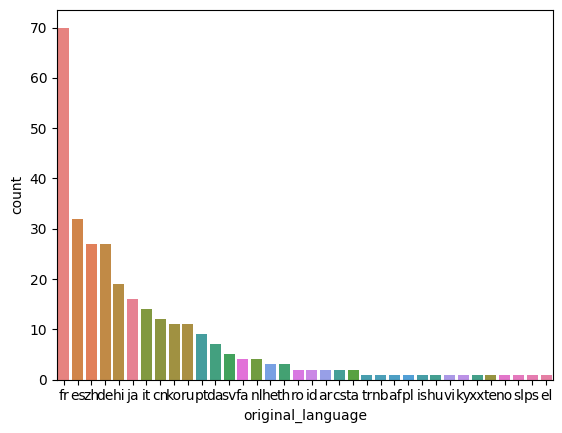

In [56]:
sns.countplot(data=tmdb.query("original_language != 'en'"), x="original_language", order=total_de_outrs_filmes_por_lingua.index, hue="original_language")

In [57]:
sns.color_palette("mako")

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

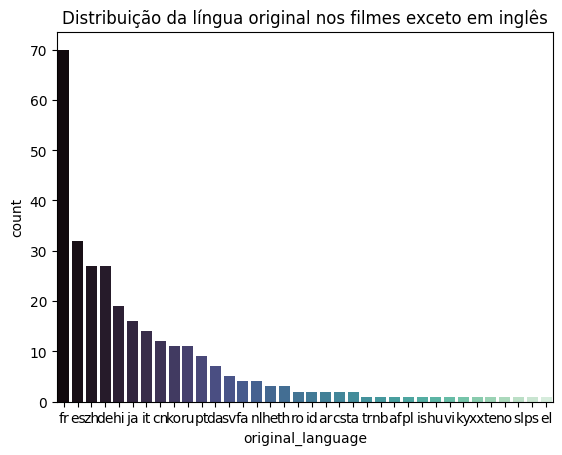

In [61]:
sns.countplot(data=tmdb.query("original_language != 'en'"), x="original_language", order=total_de_outrs_filmes_por_lingua.index, hue="original_language", palette="mako", hue_order=total_de_outrs_filmes_por_lingua.index)
plt.title("Distribuição da língua original nos filmes exceto em inglês")
plt.show()

In [63]:
tmdb.query("original_language != 'en'")['original_language'].value_counts(normalize=True)

original_language
fr    0.234899
es    0.107383
zh    0.090604
de    0.090604
hi    0.063758
ja    0.053691
it    0.046980
cn    0.040268
ko    0.036913
ru    0.036913
pt    0.030201
da    0.023490
sv    0.016779
fa    0.013423
nl    0.013423
he    0.010067
th    0.010067
ro    0.006711
id    0.006711
ar    0.006711
cs    0.006711
ta    0.006711
tr    0.003356
nb    0.003356
af    0.003356
pl    0.003356
is    0.003356
hu    0.003356
vi    0.003356
ky    0.003356
xx    0.003356
te    0.003356
no    0.003356
sl    0.003356
ps    0.003356
el    0.003356
Name: proportion, dtype: float64

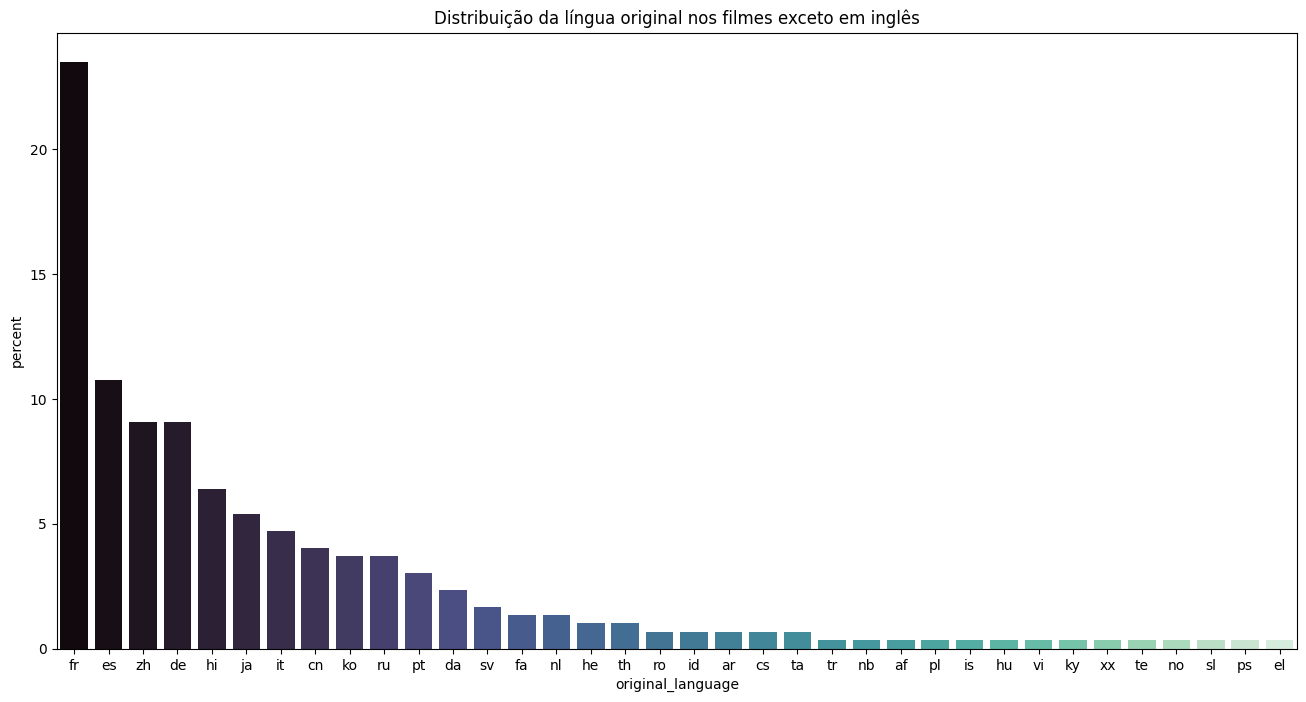

In [65]:
plt.figure(figsize=(16,8))
sns.countplot(
    data=tmdb.query("original_language != 'en'"), 
    x="original_language", 
    order=total_de_outrs_filmes_por_lingua.index, 
    hue="original_language", 
    palette="mako", 
    hue_order=total_de_outrs_filmes_por_lingua.index,
    stat="percent")
plt.title("Distribuição da língua original nos filmes exceto em inglês")
plt.show()

In [66]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [67]:
notas_toystory = notas.query("filmeId==1")["nota"]
notas_jumanji = notas.query("filmeId==2")["nota"]

media_toystory = notas_toystory.mean()
media_jumanji = notas_jumanji.mean()

print(media_toystory, media_jumanji)

3.9209302325581397 3.4318181818181817


In [69]:
mediana_toystory = notas_toystory.median()
mediana_jumanji = notas_jumanji.median()

print(mediana_toystory, mediana_jumanji)

4.0 3.5


In [72]:
import numpy as np

filme1= [2.5] * 10 + [3.5]*10
print(np.mean(filme1))
print(np.median(filme1))

3.0
3.0


In [74]:
filme2 = [5] * 10 + [1] * 10
print(np.mean(filme2))
print(np.median(filme2))

3.0
3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

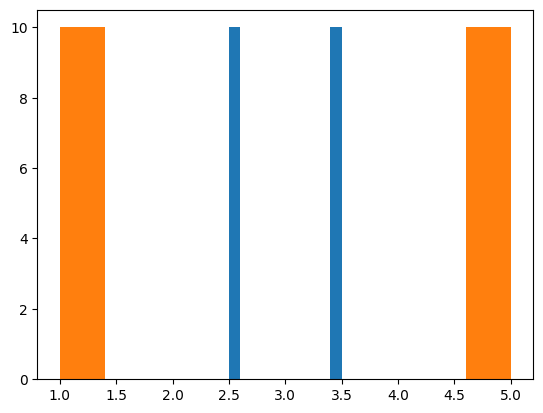

In [77]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3c906b7590>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3c906b7b60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3c906b1880>,
 'medians': [<matplotlib.lines.Line2D at 0x7f3c906b40b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3c906b43b0>,
 'means': []}

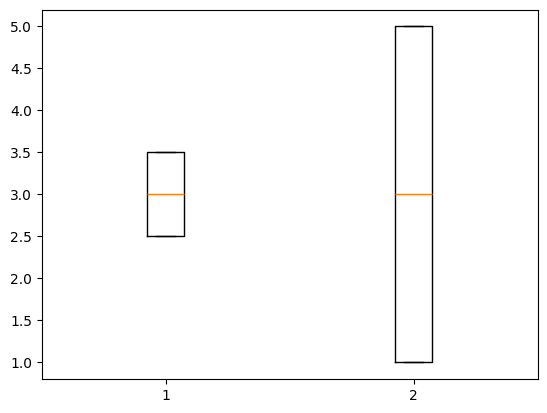

In [78]:
plt.boxplot([filme1, filme2])

In [79]:
filme0 = [3] * 20
np.mean(filme0)

3.0

In [80]:
print(np.std(filme0), np.std(filme1), np.std(filme2))

0.0 0.5 2.0


<hr>

## Exercício Desvio Padrão

In [81]:
ex_dados = np.array([[100, 120, 90, 110, 130], [80, 150, 70, 140, 60]])

ex_df = pd.DataFrame(ex_dados, index=["Semana 1", "Semana 2"], columns=["Segunda", "Terça", "Quarta", "Quinta", "Sexta"])

desvio_semana1 = ex_df.loc['Semana 1'].std()
desvio_semana2 = ex_df.loc['Semana 2'].std()

print(ex_df)
print("\nDesvio Padrão da Semana 1:", desvio_semana1.round(2))
print("Desvio Padrão da Semana 2:", desvio_semana2.round(2))

          Segunda  Terça  Quarta  Quinta  Sexta
Semana 1      100    120      90     110    130
Semana 2       80    150      70     140     60

Desvio Padrão da Semana 1: 15.81
Desvio Padrão da Semana 2: 41.83


Trazendo para ciência de dados, podemos interpretar que houve maior instabilidade ou flutuação no número de visitas em diferentes dias da semana na Semana 2, o que pode aumentar o interesse em analisar o que pode ter ocorrido e como planejar um maior engajamento para a semana inteira.

<hr>

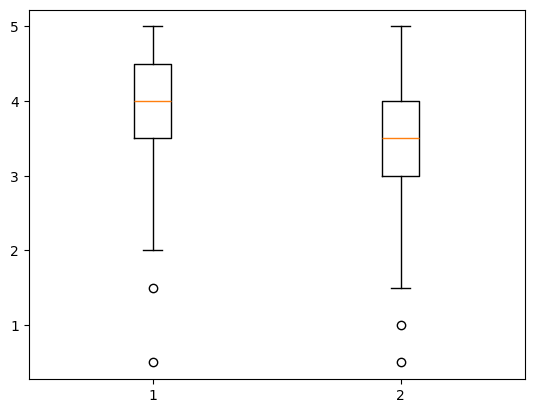

In [83]:
plt.boxplot([notas_toystory, notas_jumanji])
plt.show()

/tmp/ipykernel_703/3709659995.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=notas.query("filmeId in [1,2,3,4,5]"), x="filmeId", y="nota", palette="Set2")


<Axes: xlabel='filmeId', ylabel='nota'>

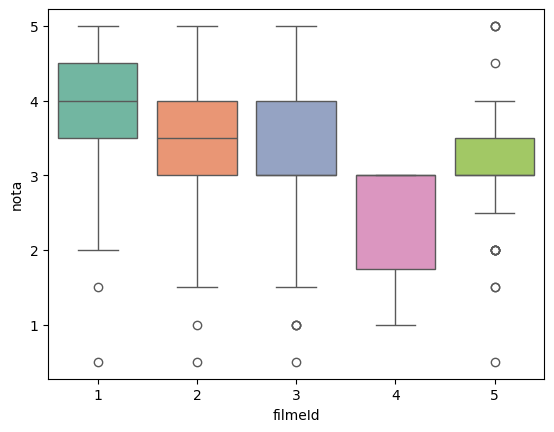

In [91]:
sns.boxplot(data=notas.query("filmeId in [1,2,3,4,5]"), x="filmeId", y="nota", palette="Set2")

In [93]:
notas.groupby("filmeId").count().tail()

,usuarioId,nota,momento
filmeId,,,
193581,1,1,1
193583,1,1,1
193585,1,1,1
193587,1,1,1
193609,1,1,1


In [94]:
notas.groupby("filmeId").count().query("nota == 1") #filmes que receberam apenas uma nota

,usuarioId,nota,momento
filmeId,,,
49,1,1,1
55,1,1,1
77,1,1,1
83,1,1,1
96,1,1,1
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1
